In [1]:
!pip install gurobipy
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

from gurobipy import *
import os

In [2]:
with open('static_one.txt') as f:
    lines = f.readlines()
print(lines)

['10 10 \n', '54 129 155 559 10.00 10.00 \n', '99999 3 15 15 15 15 15 15 \n', '15 15 \n', '120 195 258 744 10.00 10.00 \n', '3 99999 15 15 15 15 15 15 \n', '15 15 \n', '14 89 98 510 30.00 30.00 \n', '15 15 99999 8 8 8 8 8 \n', '8 8 \n', '21 96 106 521 30.00 30.00 \n', '15 15 8 99999 8 8 8 8 \n', '8 8 \n', '35 110 123 555 30.00 30.00 \n', '15 15 8 8 99999 8 8 8 \n', '8 8 \n', '45 120 135 576 30.00 30.00 \n', '15 15 8 8 8 99999 8 8 \n', '8 8 \n', '49 124 138 577 30.00 30.00 \n', '15 15 8 8 8 8 99999 8 \n', '8 8 \n', '51 126 140 573 30.00 30.00 \n', '15 15 8 8 8 8 8 99999 \n', '8 8 \n', '60 135 150 591 30.00 30.00 \n', '15 15 8 8 8 8 8 8 \n', '99999 8 \n', '85 160 180 657 30.00 30.00 \n', '15 15 8 8 8 8 8 8 \n', '8 99999 ']


In [27]:
N=int(lines[0].split(" ")[0])
info=list()
Sij=list()
for i in range(N):
    info.append(lines[3*i+1].split(" ")[:-1])
    Sij.append(lines[3*i+2].split(" ")[:-1]+lines[3*i+3].split(" ")[:-1])
info=np.array(info,dtype=np.double)
Sij=np.array(Sij,dtype=np.double)
info

array([[ 54., 129., 155., 559.,  10.,  10.],
       [120., 195., 258., 744.,  10.,  10.],
       [ 14.,  89.,  98., 510.,  30.,  30.],
       [ 21.,  96., 106., 521.,  30.,  30.],
       [ 35., 110., 123., 555.,  30.,  30.],
       [ 45., 120., 135., 576.,  30.,  30.],
       [ 49., 124., 138., 577.,  30.,  30.],
       [ 51., 126., 140., 573.,  30.,  30.],
       [ 60., 135., 150., 591.,  30.,  30.],
       [ 85., 160., 180., 657.,  30.,  30.]])

In [28]:
Sij

array([[9.9999e+04, 3.0000e+00, 1.5000e+01, 1.5000e+01, 1.5000e+01,
        1.5000e+01, 1.5000e+01, 1.5000e+01, 1.5000e+01, 1.5000e+01],
       [3.0000e+00, 9.9999e+04, 1.5000e+01, 1.5000e+01, 1.5000e+01,
        1.5000e+01, 1.5000e+01, 1.5000e+01, 1.5000e+01, 1.5000e+01],
       [1.5000e+01, 1.5000e+01, 9.9999e+04, 8.0000e+00, 8.0000e+00,
        8.0000e+00, 8.0000e+00, 8.0000e+00, 8.0000e+00, 8.0000e+00],
       [1.5000e+01, 1.5000e+01, 8.0000e+00, 9.9999e+04, 8.0000e+00,
        8.0000e+00, 8.0000e+00, 8.0000e+00, 8.0000e+00, 8.0000e+00],
       [1.5000e+01, 1.5000e+01, 8.0000e+00, 8.0000e+00, 9.9999e+04,
        8.0000e+00, 8.0000e+00, 8.0000e+00, 8.0000e+00, 8.0000e+00],
       [1.5000e+01, 1.5000e+01, 8.0000e+00, 8.0000e+00, 8.0000e+00,
        9.9999e+04, 8.0000e+00, 8.0000e+00, 8.0000e+00, 8.0000e+00],
       [1.5000e+01, 1.5000e+01, 8.0000e+00, 8.0000e+00, 8.0000e+00,
        8.0000e+00, 9.9999e+04, 8.0000e+00, 8.0000e+00, 8.0000e+00],
       [1.5000e+01, 1.5000e+01, 8.0000e+0

In [29]:
E,T,L,g,h=info[:,1],info[:,2],info[:,3],info[:,4],info[:,5]
max_c=-1000000000
scale=1000
E=E/scale
T=T/scale
L=L/scale
Sij=Sij/scale
Sij

array([[9.9999e+01, 3.0000e-03, 1.5000e-02, 1.5000e-02, 1.5000e-02,
        1.5000e-02, 1.5000e-02, 1.5000e-02, 1.5000e-02, 1.5000e-02],
       [3.0000e-03, 9.9999e+01, 1.5000e-02, 1.5000e-02, 1.5000e-02,
        1.5000e-02, 1.5000e-02, 1.5000e-02, 1.5000e-02, 1.5000e-02],
       [1.5000e-02, 1.5000e-02, 9.9999e+01, 8.0000e-03, 8.0000e-03,
        8.0000e-03, 8.0000e-03, 8.0000e-03, 8.0000e-03, 8.0000e-03],
       [1.5000e-02, 1.5000e-02, 8.0000e-03, 9.9999e+01, 8.0000e-03,
        8.0000e-03, 8.0000e-03, 8.0000e-03, 8.0000e-03, 8.0000e-03],
       [1.5000e-02, 1.5000e-02, 8.0000e-03, 8.0000e-03, 9.9999e+01,
        8.0000e-03, 8.0000e-03, 8.0000e-03, 8.0000e-03, 8.0000e-03],
       [1.5000e-02, 1.5000e-02, 8.0000e-03, 8.0000e-03, 8.0000e-03,
        9.9999e+01, 8.0000e-03, 8.0000e-03, 8.0000e-03, 8.0000e-03],
       [1.5000e-02, 1.5000e-02, 8.0000e-03, 8.0000e-03, 8.0000e-03,
        8.0000e-03, 9.9999e+01, 8.0000e-03, 8.0000e-03, 8.0000e-03],
       [1.5000e-02, 1.5000e-02, 8.0000e-0

In [42]:
def Loss_fn(x):
#     print(x)
    p=list(range(0,N))
    temp=list(np.array([x,p]).transpose())
    temp.sort(key=lambda a: (a[0]))
    temp=np.array(temp)
#     print(temp)
    bol=True
    cost=0
#     print(temp)
    for i in range(N-1):
        bol=bol and temp[i+1][0]>=np.round_(temp[i][0]+Sij[int(temp[i][1])][int(temp[i+1][1])],decimals = 3)and E[int(temp[i][1])]<=np.round_(temp[i][0],decimals = 3) and temp[i][0]<=np.round_(L[int(temp[i][1])],decimals = 3)
#         print(temp[i+1][0],temp[i][0],Sij[int(temp[i][1])][int(temp[i+1][1])],temp[i+1][0]>=temp[i][0]+Sij[int(temp[i][1])][int(temp[i+1][1])] , E[int(temp[i][1])]<=temp[i][0] , temp[i][0]<=L[int(temp[i][1])])
#         print(temp[i+1][0],temp[i][0],Sij[int(temp[i][1])][int(temp[i+1][1])],temp[i][0]+Sij[int(temp[i][1])][int(temp[i+1][1])])
        cost=cost+g[int(temp[i][1])]*max((T[int(temp[i][1])]-temp[i][0]),0)+h[int(temp[i][1])]*max((temp[i][0]-T[int(temp[i][1])]),0)
    cost=cost+g[int(temp[N-1][1])]*max((T[int(temp[N-1][1])]-temp[N-1][0]),0)+h[int(temp[N-1][1])]*max((temp[N-1][0]-T[int(temp[N-1][1])]),0)
    if bol: return -cost
    else: return max_c

In [120]:
def periodic_boundary(x):
    temp=x
    for i in range(N):
        if temp[i]<E[i]:
            temp[i]=E[i]#+alpha*np.random.uniform(0,1,1)[0]
        if temp[i]>L[i]:
            temp[i]=L[i]#-alpha*np.random.uniform(0,1,1)[0]
    return temp

In [117]:
a=np.round_([165.0, 258.0, 98.0, 106.0, 118.00000000000003, 126.00000000000003, 134.00000000000003, 142.00000000000003, 150.00000000000003, 180.0], decimals = 3)
a=a/scale
Loss_fn(a)

-0.6999999999999997

In [118]:
def initilize(n,dim):
    l=list()
    for i in range(N):
        l.append(np.random.uniform(E[i],L[i],n))
    l=np.array(l)
    l=l.transpose()
    return l

In [127]:
dim=N
n=100
pos=initilize(n,dim)
fitness=list()
for i in range(n):
    fitness.append(Loss_fn(pos[i,:]))
TT=1000
alpha=.01
beta=.001
gamma=.005
theta=.98
max_fitness=max(fitness)
index_max=fitness.index(max_fitness)
Global_best=list()

In [128]:
for k in range(TT):
    for i in range(n):
        t=np.array([0]*dim)
        for j in range(n):
            if (fitness[j]>fitness[i]):
                rij_2=np.sum(np.square(pos[i,:]-pos[j,:]))
#                 print(beta*np.exp(-gamma*rij_2)*(pos[j,:]-pos[i,:]))
                t=t+beta*np.exp(-gamma*rij_2)*(pos[j,:]-pos[i,:])
#         print(t,pos[i,:])
        t=np.round_(pos[i,:]+t+alpha*np.random.uniform(-.5,.5,dim), decimals = 5)
        t=periodic_boundary(t)
        
        new_fitness=Loss_fn(list(t))
        if new_fitness!=max_c or fitness[i]==max_c:
            pos[i,:]=t
            fitness[i]=new_fitness
            if max_fitness<= new_fitness:
                max_fitness=new_fitness
                index_max=i
    Global_best.append(max_fitness)
#     if k%10==0:
#     alpha=alpha*theta
#         else:
#             pos[i]=alpha*np.random.uniform(-.5,.5,dim)

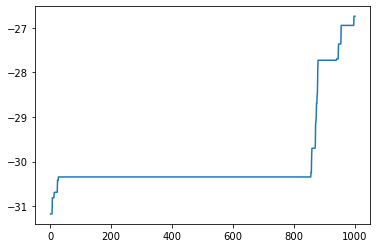

In [129]:
plt.plot(list(range(1,TT+1)),Global_best)

In [126]:
index_max
pos[index_max,:]*scale

array([409.72, 466.04, 277.93, 238.85, 212.09, 332.03, 297.06, 342.02,
       267.01, 250.96])

In [85]:
''' Scheduling Aircraft Landing (Static Case) with 1 runway
    Landing times of aircrafts are determined satisfying certain constraints
    Constraints- The aircraft should land within a predetermined time interval
                 Clearance time between two landing should be satisfied
'''


#=====================================================================
# Function to fetch data from provided txt file
# @parameters- file_name : Data file(must be present in same directory)
#=====================================================================
def fetch_data(file_name):
    data=open(file_name,'r')
    lines=data.readlines()
    num_planes=int(lines[0].split()[0])
    freeze_time=int(lines[0].split()[1])

    flight_details=np.empty([num_planes,6],dtype=float)
    sep_time=np.empty([num_planes,num_planes],dtype=int)
    s=''
    for line in lines[1:]:
        s=s+line
    s=s.split()
    flag=0
    count=0
    for items in [s[x:x+6+num_planes] for x in range(0,len(s),num_planes+6)]:
        flight_details[count]=[float(x) for x in items[:6]]
        sep_time[count]=[int(x) for x in items[6:]]
        count=count+1
    print(flight_details)
    print(sep_time)
    data.close()
    return num_planes,flight_details,sep_time

#=====================================================================
# Function to find landing time of the aircrafts
# @parameters- file_name Data file(must be present in same directory)
#=====================================================================
def schedule(file_):
    num_flights,flights,clearance=fetch_data(file_)
    try:
        #Creating a Gurobi model
        model=Model("Aircraft Landing Schedule")
        M=max(flights[:,3])-min(flights[:,1])
        z_pos={}
        for i in np.arange(1,num_flights+1):
            z_pos[i]=flights[i-1,5]
        z_neg={}
        for i in np.arange(1,num_flights+1):
            z_neg[i]=flights[i-1,4]
        x_={}
        for i in np.arange(1,num_flights+1):
            x_[i]=0
        del_={}
        for i in np.arange(1,num_flights+1):
            for j in np.arange(1,num_flights+1):
                del_[i,j]=0
            
        #Adding decision variables
        z_p=model.addVars(z_pos.keys(),lb=0,ub=GRB.INFINITY,obj=z_pos,vtype=GRB.CONTINUOUS,name="z_p")
        z_n=model.addVars(z_neg.keys(),lb=0,ub=GRB.INFINITY,obj=z_neg,vtype=GRB.CONTINUOUS,name="z_n")
        x=model.addVars(x_.keys(),lb=0,ub=GRB.INFINITY,obj=x_,vtype=GRB.CONTINUOUS,name="x")
        d=model.addVars(del_.keys(),lb=0,ub=1,obj=del_,vtype=GRB.BINARY,name="d")

        #Adding constraints
        model.addConstrs((x[j]-x[i]>=clearance[i-1,j-1] - d[j,i]*M for i in np.arange(1,num_flights+1) for j in np.arange(1,num_flights+1) if j!=i),name="Clearance")
        model.addConstrs((z_p[i]>=x[i]-flights[i-1,2] for i in np.arange(1,num_flights+1)),name="+")
        model.addConstrs((z_n[i]>=flights[i-1,2]-x[i] for i in np.arange(1,num_flights+1)),name="-")
        model.addConstrs((x[i]>=flights[i-1,1] for i in np.arange(1,num_flights+1)),name="Land after earliest landing time")
        model.addConstrs((x[i]<=flights[i-1,3] for i in np.arange(1,num_flights+1)),name="Land before latest landing time")
        model.addConstrs((d[i,j]+d[j,i]==1 for i in np.arange(1,num_flights +1) for j in np.arange(1,num_flights+1) if j!=i),name="~")

        
        model.optimize()

        # Displaying scheduled landing times
        
        for i in np.arange(1,num_flights+1):
            print('%s %g' % ('SCHEDULED LANDING TIME FOR AIRCRAFT '+str(i)+" = ", model.getVarByName("x["+str(i)+"]").X))
        s=list()
        for i in range(1,num_flights+1):
            s.append(model.getVarByName("x["+str(i)+"]").X)
        print(s)
        print(Loss_fn(s))
        
                
    except GurobiError as e:
        print('Error code ' + str(e.errno) + ": " + str(e))

    except AttributeError as a:
        print('Encountered an attribute error '+str(a))

    return model

# a='''The available cases are:
#     [1] airland1.txt with 10 flights
#     [2] airland8.txt with 50 flights
#     [3] airland13.txt with 500 flights
#     '''
schedule('static_one.txt')
# # print(a)
# num=input('Enter your choice (1/2/3):')
# if num==1:
#     schedule('airland1.txt')
# elif num==2:
#     schedule('airland8.txt')
# elif num==3:
#     schedule('airland13.txt')

# '''Print extracted data'''
#fetch_data('airland13.txt')

[[ 54. 129. 155. 559.  10.  10.]
 [120. 195. 258. 744.  10.  10.]
 [ 14.  89.  98. 510.  30.  30.]
 [ 21.  96. 106. 521.  30.  30.]
 [ 35. 110. 123. 555.  30.  30.]
 [ 45. 120. 135. 576.  30.  30.]
 [ 49. 124. 138. 577.  30.  30.]
 [ 51. 126. 140. 573.  30.  30.]
 [ 60. 135. 150. 591.  30.  30.]
 [ 85. 160. 180. 657.  30.  30.]]
[[99999     3    15    15    15    15    15    15    15    15]
 [    3 99999    15    15    15    15    15    15    15    15]
 [   15    15 99999     8     8     8     8     8     8     8]
 [   15    15     8 99999     8     8     8     8     8     8]
 [   15    15     8     8 99999     8     8     8     8     8]
 [   15    15     8     8     8 99999     8     8     8     8]
 [   15    15     8     8     8     8 99999     8     8     8]
 [   15    15     8     8     8     8     8 99999     8     8]
 [   15    15     8     8     8     8     8     8 99999     8]
 [   15    15     8     8     8     8     8     8     8 99999]]
Restricted license - for non-productio

<gurobi.Model MIP instance Aircraft Landing Schedule: 220 constrs, 130 vars, No parameter changes>

In [86]:
a=np.round_([165.0, 258.0, 98.0, 106.0, 118.00000000000003, 126.00000000000003, 134.00000000000003, 142.00000000000003, 150.00000000000003, 180.0], decimals = 3)
Loss_fn(a)

-700.0